# Feature engineering

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive. The need for manual feature engineering can be obviated by automated feature learning.

From the definition above, I want to highlight the following points:
1. Feature engineering is expensive and time-consuming because it depends on the problem and domain knowledge.
2. Feature engineering can be a manual process but in some cases…
3. Feature engineering process can be automated.

## Automatic Feature Selection
It can be a good idea to reduce the number of features to only the most useful ones
* Simpler models that generalize better (less overfitting)
 * Curse of dimensionality (e.g. kNN)
 * Even models such as RandomForest can benefit from this
 * Sometimes it is one of the main methods to improve models (e.g. gene expression data)
* Faster prediction and training
 * Training time can be quadratic (or cubic) in number of features
* Easier data collection, smaller models (less storage)
* More interpretable models: fewer features to look at

### Load data
#### Bike sharing
The Bike Sharing Demand dataset shows the amount of bikes rented in Washington DC

Some features are clearly more informative than others (e.g. temp, hour)

Some are correlated (e.g. temp and feel_temp)

We add two random features at the end

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

# Get bike sharing data from OpenML
bikes = fetch_openml(data_id=42713, as_frame=True)
X_bike_cat, y_bike = bikes.data, bikes.target

print(X_bike_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   year        17379 non-null  float64 
 2   month       17379 non-null  float64 
 3   hour        17379 non-null  float64 
 4   holiday     17379 non-null  float64 
 5   weekday     17379 non-null  float64 
 6   workingday  17379 non-null  float64 
 7   weather     17379 non-null  category
 8   temp        17379 non-null  float64 
 9   feel_temp   17379 non-null  float64 
 10  humidity    17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
dtypes: category(2), float64(10)
memory usage: 1.4 MB
None


#### Encoding

##### sklearn.compose.[ColumnTransformer(transformers, remainder='drop')](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

Applies transformers to columns of an array or pandas DataFrame.


* transformers: list of tuples  
List of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.

* remainder: {‘drop’, ‘passthrough’} or estimator, default= 'drop'  

 By default, only the specified columns in transformers are transformed and combined in the output, and the non-specified columns are dropped. (default of 'drop').
 
 By specifying remainder='passthrough', all remaining columns that were not specified in transformers will be automatically passed through. This subset of columns is concatenated with the output of the transformers. 

 By setting remainder to be an estimator, the remaining non-specified columns will use the remainder estimator. The estimator must support fit and transform. Note that using this feature requires that the DataFrame columns input at fit and transform have identical order.

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# One-hot encode the categorical features
encoder = OneHotEncoder(dtype=int)
preprocessor = ColumnTransformer(transformers=[('cat', encoder, [0,7])], remainder='passthrough')
X_bike = preprocessor.fit_transform(X_bike_cat,y_bike)

#### Add 2 random features at the end

In [5]:
# Add 2 random features at the end
random_features = np.random.rand(len(X_bike),2)
X_bike = np.append(X_bike,random_features, axis=1)

In [6]:
print(X_bike_cat['season'].cat.categories)
print(X_bike_cat['weather'].cat.categories)

Index(['fall', 'spring', 'summer', 'winter'], dtype='object')
Index(['clear', 'heavy_rain', 'misty', 'rain'], dtype='object')


#### Create feature names

In [7]:
# Create feature names
bike_names = ['fall','spring', 'summer', 'winter', 'clear', 'heavy_rain', 'misty', 'rain']

print(X_bike_cat.columns[1:7])
bike_names.extend(X_bike_cat.columns[1:7])
bike_names.extend(X_bike_cat.columns[8:])

bike_names.extend(['random_1','random_2'])

Index(['year', 'month', 'hour', 'holiday', 'weekday', 'workingday'], dtype='object')


In [25]:
pd.set_option('display.max_columns', 20)

X_bike_cat

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
0,spring,2011.0,1.0,0.0,0.0,6.0,0.0,clear,9.84,14.395,0.81,0.0000
1,spring,2011.0,1.0,1.0,0.0,6.0,0.0,clear,9.02,13.635,0.80,0.0000
2,spring,2011.0,1.0,2.0,0.0,6.0,0.0,clear,9.02,13.635,0.80,0.0000
3,spring,2011.0,1.0,3.0,0.0,6.0,0.0,clear,9.84,14.395,0.75,0.0000
4,spring,2011.0,1.0,4.0,0.0,6.0,0.0,clear,9.84,14.395,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,2012.0,12.0,19.0,0.0,1.0,1.0,misty,10.66,12.880,0.60,11.0014
17375,spring,2012.0,12.0,20.0,0.0,1.0,1.0,misty,10.66,12.880,0.60,11.0014
17376,spring,2012.0,12.0,21.0,0.0,1.0,1.0,clear,10.66,12.880,0.60,11.0014
17377,spring,2012.0,12.0,22.0,0.0,1.0,1.0,clear,10.66,13.635,0.56,8.9981


#### Show data

In [24]:
pd.DataFrame(data=X_bike, columns=bike_names)

,fall,spring,summer,winter,clear,heavy_rain,misty,rain,year,month,hour,holiday,weekday,workingday,temp,feel_temp,humidity,windspeed,random_1,random_2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,1.0,0.0,0.0,6.0,0.0,9.84,14.395,0.81,0.0000,0.994244,0.520027
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,1.0,1.0,0.0,6.0,0.0,9.02,13.635,0.80,0.0000,0.133824,0.641929
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,1.0,2.0,0.0,6.0,0.0,9.02,13.635,0.80,0.0000,0.433546,0.490182
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,1.0,3.0,0.0,6.0,0.0,9.84,14.395,0.75,0.0000,0.543846,0.375650
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,1.0,4.0,0.0,6.0,0.0,9.84,14.395,0.75,0.0000,0.741231,0.414544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,12.0,19.0,0.0,1.0,1.0,10.66,12.880,0.60,11.0014,0.303227,0.443942
17375,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,12.0,20.0,0.0,1.0,1.0,10.66,12.880,0.60,11.0014,0.856192,0.412537
17376,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2012.0,12.0,21.0,0.0,1.0,1.0,10.66,12.880,0.60,11.0014,0.993279,0.030986
17377,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2012.0,12.0,22.0,0.0,1.0,1.0,10.66,13.635,0.56,8.9981,0.678172,0.350684


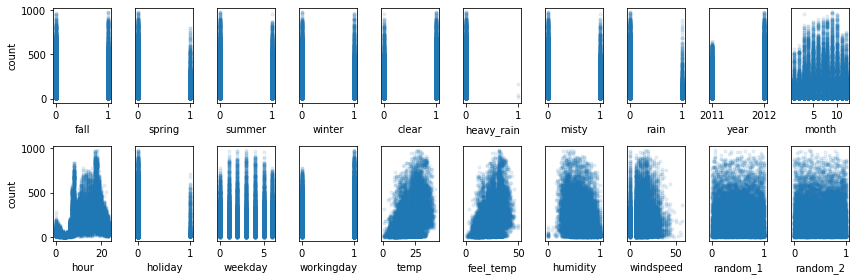

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 10, figsize=(12, 4))
for i, ax in enumerate(axes.ravel()):
    ax.plot(X_bike[:, i], y_bike[:], '.', alpha=.1)
    ax.set_xlabel("{}".format(bike_names[i]))
    ax.get_yaxis().set_visible(False)
for i in range(2):
    axes[i][0].get_yaxis().set_visible(True)
    axes[i][0].set_ylabel("count")
fig.tight_layout()

### Unsupervised feature selection
* Variance-based
 * Remove (near) constant features
   * Choose a small variance threshold
 * Scale features before computing variance!
 * Infrequent values may still be important
* Covariance-based
 * Remove correlated features
 * The small differences may actually be important
   * You don't know because you don't consider the target

#### Variance based feature selection

- **sklearn.feature_selection.[VarianceThreshold(threshold)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold)** : 
  * threshold defalut = 0.0
  * Feature selector that removes all low-variance features.
  * Using fix() to learn empirical variances from X.

In [10]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler를 적용한 X_bike의 분산을 학습함
selector = VarianceThreshold(0.1).fit(MinMaxScaler().fit_transform(X_bike))

# 학습한 variance를 받아옴.
variances = selector.variances_

variances

array([1.91775773e-01, 1.84508891e-01, 1.89334828e-01, 1.84214052e-01,
       2.25441310e-01, 1.72592332e-04, 1.93101047e-01, 7.49835014e-02,
       2.49993444e-01, 9.77231238e-02, 9.03709770e-02, 2.79426217e-02,
       1.11746879e-01, 2.16613210e-01, 3.86044631e-02, 2.95307973e-02,
       3.72197791e-02, 2.06804850e-02, 8.28493969e-02, 8.25918787e-02])

Use pandas.DataFrame.[var()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html#pandas-dataframe-var)

* Return unbiased variance over requested axis.

In [11]:
# 위의 variances_를 불러온 것과 같은 결과를 보여줌.
pd.DataFrame(MinMaxScaler().fit_transform(X_bike)).var()

0     0.191787
1     0.184520
2     0.189346
3     0.184225
4     0.225454
5     0.000173
6     0.193112
7     0.074988
8     0.250008
9     0.097729
10    0.090376
11    0.027944
12    0.111753
13    0.216626
14    0.038607
15    0.029532
16    0.037222
17    0.020682
18    0.082854
19    0.082597
dtype: float64

##### visulization

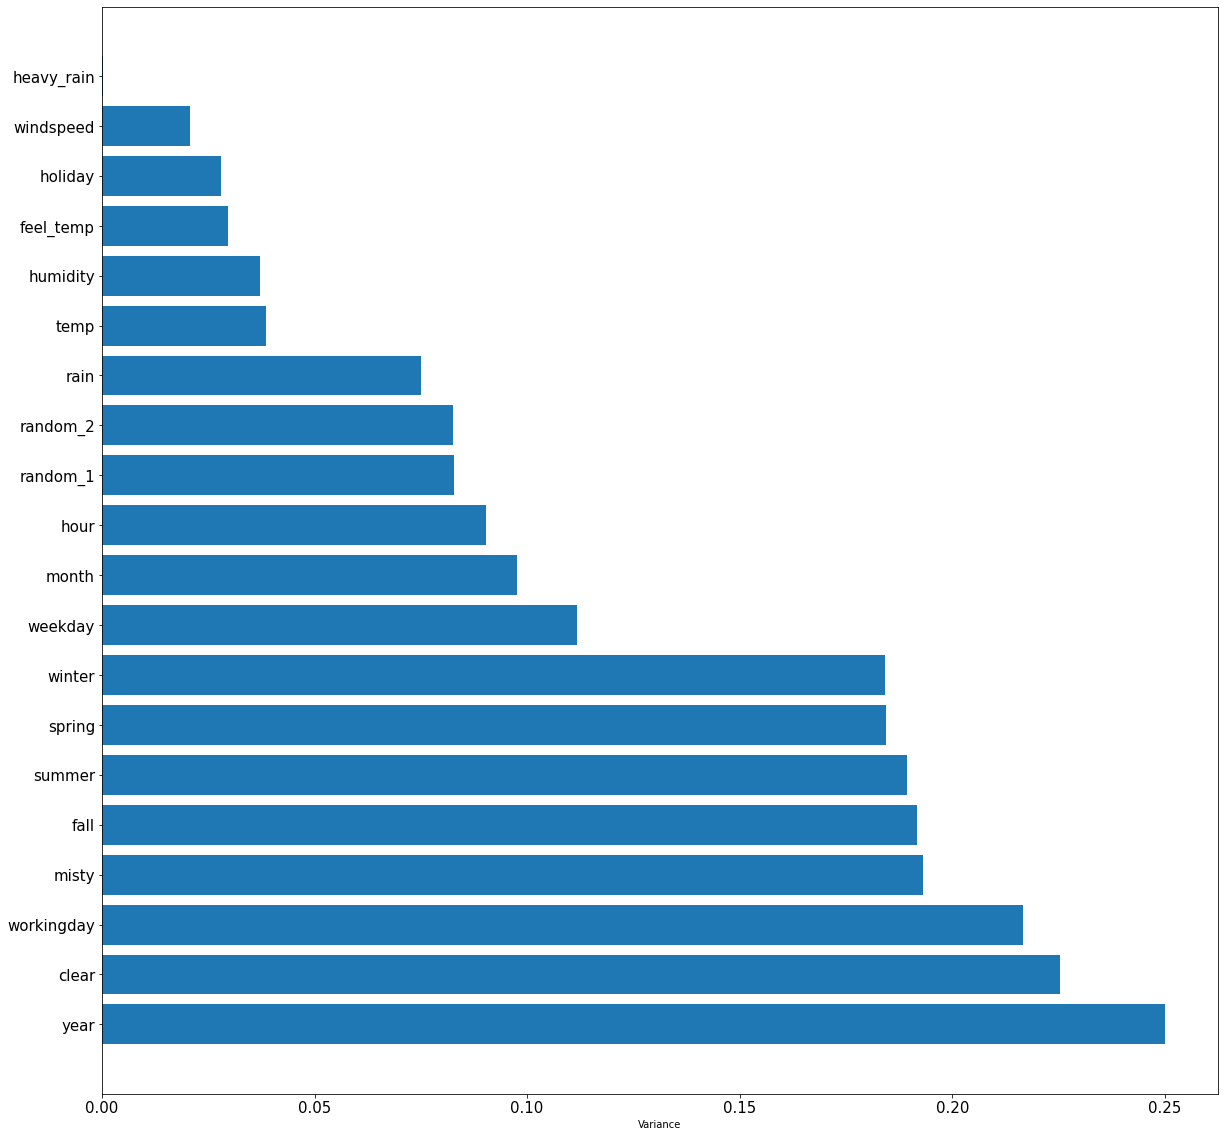

In [12]:
# 결과를 오름차순으로 정렬한 인덱스를 저장
var_sort = np.argsort(variances)

# matplot을 통한 그래프 출력
plt.figure(figsize=(20, 20))
ypos = np.arange(20)[::-1]
plt.barh(ypos, variances[var_sort][:20], align='center')
plt.yticks(ypos, np.array(bike_names)[var_sort][:20], fontsize = 15)
plt.xticks(fontsize=15)
plt.xlabel("Variance");

In [13]:
def get_idx(idx_list):
  return_list = []
  for idx in idx_list:
    column_num = int(idx.lstrip('x'))
    return_list.append(column_num)
  return return_list


# 분산이 0.1 이상인 feature 출력
selector_trans = selector.get_feature_names_out()
print("Feature Index\n",selector_trans, "\n\n")

# 선택된 idx 번호
select_idx= get_idx(selector_trans)
select_names = []

# 해당하는 feature 받아 오기.
for i in select_idx:
  select_names.append(bike_names[i])

# 기존 데이터의 feature 및 각 feature 별 분산 출력
origin = pd.DataFrame(X_bike, columns = bike_names)
print("기존 데이터\n")
print(origin.var(),"\n\n")

# 선택된 feature 및 각 feature 별 분산 출력
selector_trans= pd.DataFrame(selector.transform(MinMaxScaler().fit_transform(X_bike)), columns=select_names )
print("VarianceTreshold = 0.1\n")
selector_trans.var()

Feature Index
 ['x0' 'x1' 'x2' 'x3' 'x4' 'x6' 'x8' 'x12' 'x13'] 


기존 데이터

fall           0.191787
spring         0.184520
summer         0.189346
winter         0.184225
clear          0.225454
heavy_rain     0.000173
misty          0.193112
rain           0.074988
year           0.250008
month         11.825178
hour          47.808998
holiday        0.027944
weekday        4.023119
workingday     0.216626
temp          62.327882
feel_temp     73.831242
humidity       0.037222
windspeed     67.187453
random_1       0.082826
random_2       0.082573
dtype: float64 


VarianceTreshold = 0.1



fall          0.191787
spring        0.184520
summer        0.189346
winter        0.184225
clear         0.225454
misty         0.193112
year          0.250008
weekday       0.111753
workingday    0.216626
dtype: float64

#### Covariance based feature selection
* Remove features $X_i (=X_{:, i})$ that are highly correlated (have high correlation coefficient $\rho$)

  $\rho (X_1,X_2)={\frac  {{\mathrm  {cov}}(X_1,X_2)}{\sigma (X_1)\sigma (X_2)}} = {\frac { \frac{1}{N-1} \sum_i (X_{i,1} - \overline{X_1})(X_{i,2} - \overline{X_2}) }{\sigma (X_1)\sigma (X_2)}}$


* Should we remove feel_temp? Or temp? Maybe one correlates more with the target?

* pandas.DataFrame.[cov()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html)

 * Compute pairwise covariance of columns, excluding NA/null values.


In [14]:
from sklearn.preprocessing import scale

X_bike_scaled = scale(X_bike)

X_bike_scaled_df = pd.DataFrame(X_bike_scaled)

In [15]:
# 각 column의 주어진 데이터와 가중치로 공분산 행렬을 추정함.
cov = X_bike_scaled_df.cov()

##### visualization

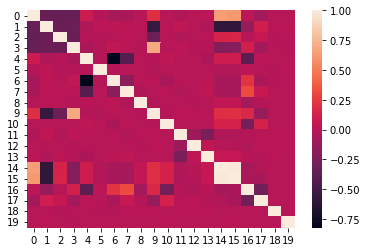

In [16]:
import seaborn as  sns
sns.heatmap(cov)

### Supervised feature selection: overview
* Univariate: F-test and Mutual Information
* Model-based: Random Forests, Linear models, kNN
* Wrapping techniques (black-box search)
* Permutation importance

#### Univariate statistics (F-test)
* Keep features for which there is a statistically significant relationship * between it and the target.
* Consider each feature individually (univariate), independent of the model that you might want to apply afterwards.
* We can use different tests to measure how informative a feature is:

`f_regression`: For numeric targets. Measures the performance of a linear regression model trained on only one feature.

`f_classif`: For categorical targets. Measures the F-statistic from one-way Analysis of Variance (ANOVA), or the proportion of total within-class variance explained by one feature.

* F-statistic = $\frac{var(μ_i)}{var(X_i)}$ (higher is better)
  * $X_i$ : all samples with class i.
  * Better if per-class distributions separate well: means are far apart and variance is small.

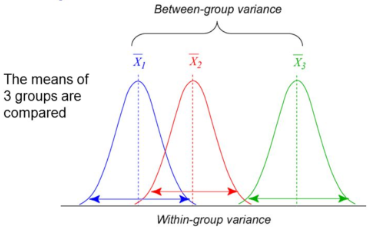

`chi2`: For categorical features and targets. Performs the chi-square $(x^2)$ statistic. Similar results as F-statistic, but less sensitive to nonlinear relationships.

Chi-squared for a feature with $c$ categories and $k$ classes:
$x^2=\sum_{t=0}^c\sum_{j=0}^k\frac{O_{tj}-E_{tj}}{E_{tj}}$

where $O_{tj}$ is the number of observations of feature category $i$ and class $j$, and $E_{tj}$ is the expected number of observations of category $i$ and class $j$ if there was no relationship between the feature and the target (number of samples of category $i$ * ratio of class $j$).



##### Sklearn's f-regression

sklearn.feature_selection.[f_regression(X, y, *, center=True, force_finite=True)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html) 

Univariate linear regression tests returning F-statistic and p-values.

Quick linear model for testing the effect of a single regressor, sequentially for many regressors.

* X: {array-like, sparse matrix} of shape (n_samples, n_features)  
  The data matrix.

* y: array-like of shape (n_samples,)  
  The target vector.

* center: bool, default=True  
Whether or not to center the data matrix X and the target vector y. By default, X and y will be centered.

* force_finite: bool, default=True  
Whether or not to force the F-statistics and associated p-values to be finite. 


Returns:
* f_statistic: ndarray of shape (n_features,)  
F-statistic for each feature.

* p_values: ndarray of shape (n_features,)  
P-values associated with the F-statistic. 



In [19]:
 from sklearn.feature_selection import f_regression
  
 f_test= f_regression(scale(X_bike),y_bike)[0]
 print("F_statistic: \n", f_test)

F_statistic: 
 [4.08876838e+02 1.11405749e+03 6.42445846e+01 1.50545674e+01
 2.43179452e+02 1.20881940e+00 3.83097591e+01 2.89605471e+02
 1.16336517e+03 2.56630498e+02 3.19461422e+03 1.66369805e+01
 1.25831453e+01 1.59518228e+01 3.40492256e+03 3.32825126e+03
 2.02284831e+03 1.52374764e+02 2.78663268e-02 3.78773370e-02]


In [20]:
 p_value= f_regression(scale(X_bike),y_bike)[1]

 p_value

array([6.95210004e-090, 8.23170004e-237, 1.16813490e-015, 1.04832534e-004,
       1.86445720e-054, 2.71581295e-001, 6.17133326e-010, 2.01554064e-064,
       7.21318421e-247, 2.39702153e-057, 0.00000000e+000, 4.54616895e-005,
       3.90266235e-004, 6.52426455e-005, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 7.34574237e-035, 8.67425416e-001, 8.45691930e-001])

###### sklearn.feature_selection.[SelectPercentile(score_func=<function f_classif>, *, percentile=10)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html)

Select features according to a percentile of the highest scores.

* score_func: callable, default=f_classif  
Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores.  
Default is f_classif (see below “See Also”).  
The default function only works with classification tasks.


* percentileint, default=10  
Percent of features to keep.

In [ ]:
from sklearn.feature_selection import SelectPercentile

df = pd.DataFrame(bike_names, columns=['feature'])

for t in [25, 50, 75, 100]:
    selector = SelectPercentile(score_func=f_regression, percentile=t).fit(scale(X_bike), y_bike)
    # get_support method는 선택된 특성을 boolean 값으로 표시해, 어떤 특성이 선택됐는지 알 수 있다.
    df[t] = selector.get_support()

df

,feature,25,50,75,100
0,fall,False,True,True,True
1,spring,False,True,True,True
2,summer,False,False,True,True
3,winter,False,False,False,True
4,clear,False,True,True,True
5,heavy_rain,False,False,False,True
6,misty,False,False,True,True
7,rain,False,True,True,True
8,year,True,True,True,True
9,month,False,True,True,True


##### More Example of Univariate statistics

In [21]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

* Given a feature ranking, sklearn has two general ways to remove features :  
 **SelectKBest** will only keep the features with the lowest p values.  
  * sklearn.feature_selection.[SelectKBest(score_func= function f_classif, *, k=10)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)  
  Select features according to a percentile of the highest scores.
   * score_func: callable, default=f_classif  
Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores. Default is f_classif (see below “See Also”). The default function only works with classification tasks.

   * k: int or “all”, default=10  
Number of top features to select. The “all” option bypasses selection, for use in a parameter search.  

 
 **SelectPercentile** selects a fixed percentage of features. Retrieve the selected features with get_support()

**Visualization**

Text(0.5, 0, 'Sample index')

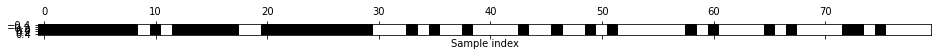

In [22]:
# use f_classif (the default) and SelectPercentile to select 50% of features:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# get_support method는 선택된 특성을 boolean 값으로 표시해, 어떤 특성이 선택됐는지 알 수 있다.
mask = select.get_support()

# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

#### Mutual information

sklearn.feature_selection.[mutual_info_regression(X, y, *, discrete_features='auto', random_state=None)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html)

* Estimate mutual information for a continuous target variable.

* X: array-like or sparse matrix, shape (n_samples, n_features)  
Feature matrix.

* y: array-like of shape (n_samples,)  
Target vector.

* discrete_features: {‘auto’, bool, array-like}, default=’auto’  
If bool, then determines whether to consider all features discrete or continuous. If array, then it should be either a boolean mask with shape (n_features,) or array with indices of discrete features. If ‘auto’, it is assigned to False for dense X and to True for sparse X.

* random_state: int, RandomState instance or None, default=None  
Determines random number generation for adding small noise to continuous variables in order to remove repeated values. 

In [ ]:
 from sklearn.feature_selection import mutual_info_regression

 # first 13 features are discrete
 mutual_info_regression(scale(X_bike),y_bike,discrete_features=range(13), random_state=42)

array([1.83076574e-02, 4.86530335e-02, 3.46485753e-03, 2.99847740e-03,
       9.60764162e-03, 1.29682669e-05, 5.52939453e-03, 1.28872260e-02,
       3.75387972e-02, 7.73033014e-02, 6.25269661e-01, 2.22990453e-03,
       1.58379675e-02, 8.16269248e-03, 1.38495965e-01, 1.47593479e-01,
       9.61455412e-02, 1.79505067e-02, 1.36786806e-03, 0.00000000e+00])

#### Model-based Feature Selection
Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. They consider all features together, and are thus able to capture interactions: a feature may be more (or less) informative in combination with others.

The supervised model that is used for feature selection doesn’t need to be the same model that is used for the final supervised modeling, it only needs to be able to measure the (perceived) importance for each feature:

* Decision tree–based models return a feature_importances_ attribute
* Linear models return coefficients (coef_), whose absolute values also reflect feature importance

In scikit-learn, we can do this using **SelectFromModel**. It requires a model and a threshold. Threshold='median' means that the median observed feature importance will be the threshold, which will remove 50% of the features.



```python
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")
```


* Random Forests are known to produce good estimates of feature importance
  * Based on how often a feature is used high up in the trees
  * Based on Information Gain or Mean Decrease in Impurity (MDI)
  * Use with care: Beware Default Random Forest Importances
  * Tune the RandomForest (e.g. min_samples_leaf)
  * Use permutation importance (coming up)
* In our example, all but two of the original features were selected, and most of the noise features removed.
* Our logistic regression model improves further

##### SelectFromModel

###### load data(bike)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

# Get bike sharing data from OpenML
bikes = fetch_openml(data_id=42713, as_frame=True)
X_bike_cat, y_bike = bikes.data, bikes.target

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# One-hot encode the categorical features
encoder = OneHotEncoder(dtype=int)
preprocessor = ColumnTransformer(transformers=[('cat', encoder, [0,7])], remainder='passthrough')
X_bike = preprocessor.fit_transform(X_bike_cat,y_bike)

# Add 2 random features at the end
random_features = np.random.rand(len(X_bike),2)
X_bike = np.append(X_bike,random_features, axis=1)

# Create feature names
bike_names = ['fall','spring', 'summer', 'winter', 'clear', 'heavy_rain', 'misty', 'rain']

print(X_bike_cat.columns[1:7])
bike_names.extend(X_bike_cat.columns[1:7])
bike_names.extend(X_bike_cat.columns[8:])

bike_names.extend(['random_1','random_2'])

modi_bike_df = pd.DataFrame(data=X_bike, columns=bike_names)

modi_bike_df

Index(['year', 'month', 'hour', 'holiday', 'weekday', 'workingday'], dtype='object')


,fall,spring,summer,winter,clear,heavy_rain,misty,rain,year,month,hour,holiday,weekday,workingday,temp,feel_temp,humidity,windspeed,random_1,random_2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,1.0,0.0,0.0,6.0,0.0,9.84,14.395,0.81,0.0000,0.981229,0.089249
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,1.0,1.0,0.0,6.0,0.0,9.02,13.635,0.80,0.0000,0.711870,0.587750
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,1.0,2.0,0.0,6.0,0.0,9.02,13.635,0.80,0.0000,0.765685,0.552454
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,1.0,3.0,0.0,6.0,0.0,9.84,14.395,0.75,0.0000,0.124941,0.441250
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,1.0,4.0,0.0,6.0,0.0,9.84,14.395,0.75,0.0000,0.104887,0.315897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,12.0,19.0,0.0,1.0,1.0,10.66,12.880,0.60,11.0014,0.567499,0.089317
17375,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,12.0,20.0,0.0,1.0,1.0,10.66,12.880,0.60,11.0014,0.442073,0.921007
17376,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2012.0,12.0,21.0,0.0,1.0,1.0,10.66,12.880,0.60,11.0014,0.476151,0.684627
17377,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2012.0,12.0,22.0,0.0,1.0,1.0,10.66,13.635,0.56,8.9981,0.586353,0.660589


SelectFromModel을 사용하기 위한 모델 선언

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state= 1)

forest.fit(X_bike, y_bike)

# feature_importances 결과 저장
importances = forest.feature_importances_ 

In [ ]:
importances

array([5.39470922e-04, 1.38695938e-02, 8.16404736e-04, 6.40583555e-03,
       1.75054834e-03, 1.60931170e-06, 8.79533838e-04, 1.52636886e-02,
       7.91439041e-02, 1.46749476e-02, 6.09889224e-01, 2.44873040e-03,
       1.14704423e-02, 5.69314441e-02, 1.19786226e-01, 1.83164645e-02,
       2.37295284e-02, 7.22095920e-03, 8.47558707e-03, 8.38585767e-03])

###### sklearn.feature_selection.[SelectFromModel(estimator, *, threshold=None, prefit=False)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html?highlight=selectfrommodel#sklearn.feature_selection.SelectFromModel)

Meta-transformer for selecting features based on importance weights.

* estimator: object  
The base estimator from which the transformer is built. This can be both a fitted (if prefit is set to True) or a non-fitted estimator. 

 The estimator should have a **feature_importances_** or **coef_** attribute after fitting. Otherwise, the importance_getter parameter should be used.  


* threshold: str or float, default=None  
The threshold value to use for feature selection.  
Features whose importance is greater or equal are kept while the others are discarded. If “median” (resp. “mean”), then the threshold value is the median (resp. the mean) of the feature importances or coef_

 A scaling factor (e.g., “1.25*mean”) may also be used. If None and if the estimator has a parameter penalty set to l1, either explicitly or implicitly (e.g, Lasso), the threshold used is 1e-5. Otherwise, “mean” is used by default.

* prefit:bool, default=False  
Whether a prefit model is expected to be passed into the constructor directly or not.  
If True, estimator must be a fitted estimator.  
If False, estimator is fitted and updated by calling fit and partial_fit, respectively.

In [ ]:
from sklearn.feature_selection import SelectFromModel

# feature importance의 값이 0.1 이상인 feature를 선택함.
sfm = SelectFromModel(forest, threshold = 0.1, prefit = True)

x_selected = sfm.transform(X_bike)

print('이 임계 조건을 만족하는 샘플의 수:', x_selected.shape[1])

feat_labels = modi_bike_df.columns

selected_vars = list(feat_labels[sfm.get_support()])

selected_vars

이 임계 조건을 만족하는 샘플의 수: 2


['hour', 'temp']

In [ ]:
from sklearn.feature_selection import SelectFromModel

# feature importance의 값이 평균 이상인 feature를 선택함.
sfm = SelectFromModel(forest, threshold = 'mean', prefit = True)

x_selected = sfm.transform(X_bike)

print('이 임계 조건을 만족하는 샘플의 수:', x_selected.shape[1])

feat_labels = modi_bike_df.columns

selected_vars = list(feat_labels[sfm.get_support()])

selected_vars

이 임계 조건을 만족하는 샘플의 수: 4


['year', 'hour', 'workingday', 'temp']

##### Iterative feature selection
Instead of building a model to remove many features at once, we can also just ask it to remove the worst feature, then retrain, remove another feature, etc. This is known as recursive feature elimination (RFE).

```python
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)
```

Vice versa, we could also ask it to iteratively add one feature at a time. This is called forward selection.

In both cases, we need to define beforehand how many features to select. When this is unknown, one often considers this as an additional hyperparameter of the whole process (pipeline) that needs to be optimized.

Can be rather slow.

RFE result:

* Fewer noise features, only 1 original feature removed
* LogisticRegression performance about the same



 sklearn.feature_selection.[RFE(estimator, *, n_features_to_select=None)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)
 * Feature ranking with recursive feature elimination.
 * n_features_to_select : int or float, default=None  
The number of features to select. If None, half of the features are selected.   
If integer, the parameter is the absolute number of features to select.   
If float between 0 and 1, it is the fraction of features to select.

In [29]:
from sklearn.feature_selection import RFE

# 계산한 각 피쳐의 순위를 확인
rank = RFE(RandomForestRegressor(), n_features_to_select=3).fit(X_bike, y_bike).ranking_

rank

array([17,  6, 15, 12, 14, 18, 16,  7,  1,  4,  1, 13,  8,  2,  1,  5,  3,
       11, 10,  9])

#### Squential feature selection (Wrapping)

* Evaluate your model with different sets of features, find best subset based on performance

* Greedy black-box search (can end up in local minima)

 * Backward selection: remove least important feature, recompute importances, repeat

 * Forward selection: set aside most important feature, recompute importances, repeat

##### sklearn.feature_selection.[SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html?highlight=sequentialfeatureselector#sklearn.feature_selection.SequentialFeatureSelector)
[(estimator, *, n_features_to_select='warn', direction='forward')](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html?highlight=sequentialfeatureselector#sklearn.feature_selection.SequentialFeatureSelector)

* estimator: estimator instance
An unfitted estimator.

* n_features_to_select: "auto", int or float, default="warn"
If "auto", the behaviour depends on the tol parameter:

 if tol is not None, then features are selected until the score improvement does not exceed tol.

 otherwise, half of the features are selected.

 If integer, the parameter is the absolute number of features to select. If float between 0 and 1, it is the fraction of features to select.
* direction: {'forward', 'backward'}, default= 'forward'  
Whether to perform forward selection or backward selection.



In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Sequential Feature Selection
# n_features_to_select 수치를 조정하여 몇 개의 feature를 뽑을지 정할 수 있음
sfs = SequentialFeatureSelector(lr, n_features_to_select=0.3)

result = sfs.fit(X_bike, y_bike)

##### 선택된 Feature 출력

In [ ]:
def get_idx(idx_list):
  return_list = []
  for idx in idx_list:
    column_num = int(idx.lstrip('x'))
    return_list.append(column_num)
  return return_list

f_list = result.get_feature_names_out()

# 선택된 idx
select_idx= get_idx(f_list)
select_names = []

# 해당하는 feature 받아 오기.
for i in select_idx:
  select_names.append(bike_names[i])

select_names

['fall', 'spring', 'year', 'hour', 'feel_temp', 'humidity']

#### Permutation feature importance

* Model inspection technique, especially useful for non-linear or opaque estimators.
*  Defined as the decrease in a model score when a single feature value is randomly shuffled.
*  This breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.
*  Model agnostic, metric agnostic, and can be calculated many times with different permutations.
  *  The problem with impurity based techniques (e.g. Random Forest)
Gives importance to features not predictive on unseen data.
    *  Permutation feature importance can be applied to unseen data.
  *  Strong bias towards high cardinality features (e.g. numerical features).
    *  Permutation feature importances do not exhibit such a bias.

Example (Titanic dataset)
*  We add a random feature as well: Random Forest deems it important!
*  Low cardinality feature sex and pclass are actually more important

sklearn.inspection.[permutation_importance  
(estimator, X, y, *, n_repeats=5, n_jobs=None, random_state=None, max_samples=1.0)](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance)

  
  
Permutation importance for feature evaluation

* estimator: object  
An estimator that has already been fitted and is compatible with scorer.

* X: ndarray or DataFrame, shape (n_samples, n_features)  
Data on which permutation importance will be computed.

* y: array-like or None, shape (n_samples, ) or (n_samples, n_classes)  
Targets for supervised or None for unsupervised.

* n_repeats: int, default=5  
Number of times to permute a feature.

* n_jobs: int or None, default=None  
Number of jobs to run in parallel.   
The computation is done by computing permutation score for each columns and parallelized over the columns.  
None means 1 unless in a joblib.parallel_backend context.  
 -1 means using all processors.

* max_samples: int or float, default=1.0  

Returns
* result: Bunch or dict of such instances  
Dictionary-like object, with the following attributes.

* importances_mean: ndarray of shape (n_features, )  
Mean of feature importance over n_repeats.

* importances_std: ndarray of shape (n_features, )  
Standard deviation over n_repeats.

* importances: ndarray of shape (n_features, n_repeats)  
Raw permutation importance scores.

 If there are multiple scoring metrics in the scoring parameter result is a dict with scorer names as keys (e.g. ‘roc_auc’) and Bunch objects like above as values.

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor

pi_importances_mean = permutation_importance(RandomForestRegressor().fit(X_bike, y_bike), X_bike, y_bike, 
                                                    n_repeats=10, random_state=42, n_jobs=-1).importances_mean

pi_importances_mean                                                   

array([6.76260718e-04, 2.69486065e-02, 7.01586826e-04, 1.19420289e-02,
       2.02307484e-03, 1.70697195e-07, 7.45323530e-04, 2.31636746e-02,
       2.19666029e-01, 3.66883554e-02, 1.38633373e+00, 3.40952829e-03,
       2.46048283e-02, 3.02043526e-01, 1.71596024e-01, 2.65951282e-02,
       5.98373422e-02, 7.08734589e-03, 6.79744691e-03, 6.94717867e-03])

## Feature Transformation

### make_pipeline

sklearn.pipeline.[make_pipeline(*steps, memory=None, verbose=False)](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline)

**(default memory=None, default verbose=False)**


**Construct a Pipeline from the given estimators.**

* steps: list of tuple

* memory: str or object with the joblib.Memory interface, default=None

  Used to cache the fitted transformers of the pipeline.
* verbose: bool, default=False

see detail: sklearn.pipline.[Pipeline(steps, *, memory=None, verbose=False)](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)




The Pipeline class in **sklearn** is a useful wrapper tool that provides the ability to process successive transformations sequentially.

The ```make_pipeline``` function can associate a sklearn converter (an object that supports the fit and transform methods for input), followed by a sklearn estimator that implements the ```fit()``` and ```predict()``` methods.

![img](https://t1.daumcdn.net/cfile/tistory/99EF85365E24E3A41A)

### Pipeline

#### Load data

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
target = iris.target

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Create pipeline

In [ ]:
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df, target,test_size =0.2, random_state =11)

pipe =  Pipeline([('scaler', StandardScaler()), ('linear_regression',LinearRegression())])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.8945851762592452

#### Pipeline parameters

#### Approach to Parameters

It enables setting parameters of the various steps using their names and the parameter name separated by a '__', as in the example below.

In [ ]:
print(pipe[0])

print(pipe[1])
# We coded like...
# pipe =  Pipeline([('scaler', StandardScaler()), ('linear_regression',LinearRegression())])
pipe.set_params(linear_regression__normalize=True) # Change linear_regression's normalize parameter
print(pipe[1])

StandardScaler()
LinearRegression()
LinearRegression(normalize=True)


#### Set Parameter  with GridSearchCV()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
param_grid = dict(scaler__with_mean=[True, False],linear_regression__normalize=[False, True])
grid_search = GridSearchCV(pipe, param_grid= param_grid)

grid_search.fit(X_train, Y_train)

print(grid_search.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('linear_regression', LinearRegression(normalize=True))])


#### Scoring pipelines using the Best_estimator

In [ ]:
pipe2 = Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('linear_regression', LinearRegression(normalize=False))])
pipe2.fit(X_train, Y_train)
pipe2.score(X_test, Y_test)

0.8945851762592452

### Feature Addition

* Create new features based on existing ones
  * Polynomial features
  * Interaction features
  * Binning
* Mainly useful for simple models (e.g. linear models)
  * Other models can learn interations themselves
  * But may be slower, less robust than linear models


#### Polynomials
* Add all polynomials up to degree  and all products
  * Equivalent to polynomial basis expansions $[1, x_1, ..., x_p] \xrightarrow{} [1, x_1, ..., x_p, x_1^2, ..., x_p^2, ..., x_p^d, x_1 x_2, ..., x_{p-1} x_p]$

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


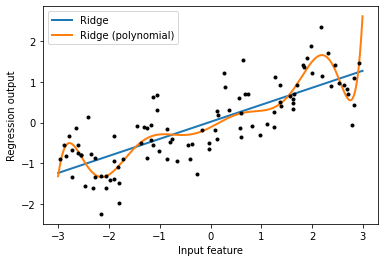

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
%pip install mglearn
import mglearn

# Wavy data
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

# Normal ridge
lreg = Ridge().fit(X, y)
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(line, lreg.predict(line), lw=2, label="Ridge")

# include polynomials up to x ** 10
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)
preg = Ridge().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, preg.predict(line_poly), lw=2, label='Ridge (polynomial)')

plt.plot(X[:, 0], y, '.', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

#### Binning
* Partition numeric feature values into $n$ intervals (bins)

* Create $n$ new one-hot features, 1 if original value falls in corresponding bin

* Models different intervals differently (e.g. different age groups)

##### Data import

In [38]:
import mglearn

# Wavy data
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

##### Binning & Encoding & Data Processing

In [39]:
from sklearn.preprocessing import OneHotEncoder

# create 11 equal bins
bins = np.linspace(-3, 3, 5)

# assign to bins
which_bin = np.digitize(X, bins=bins)

# transform using the OneHotEncoder.
encoder = OneHotEncoder(sparse=False)

# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)

# Plot transformed data
bin_names = [('[%.1f,%.1f]') % i for i in zip(bins, bins[1:])]
df_orig = pd.DataFrame(X, columns=["orig"])
df_nr = pd.DataFrame(which_bin, columns=["which_bin"])

##### Show Data

In [40]:
# table style
table_font_size = 12
heading_properties = [('font-size', table_font_size)]
cell_properties = [('font-size', table_font_size)]
dfstyle = [dict(selector="th", props=heading_properties),\
 dict(selector="td", props=cell_properties)]
table_font_size = 12


# add the original features
X_combined = np.hstack([X, X_binned])
ohedf = pd.DataFrame(X_combined, columns=["orig"]+bin_names).head(3)
ohedf.style.set_table_styles(dfstyle)

,orig,"[-3.0,-1.5]","[-1.5,0.0]","[0.0,1.5]","[1.5,3.0]"
0,-0.752759,0.000000,1.000000,0.000000,0.000000
1,2.704286,0.000000,0.000000,0.000000,1.000000
2,1.391964,0.000000,0.000000,1.000000,0.000000


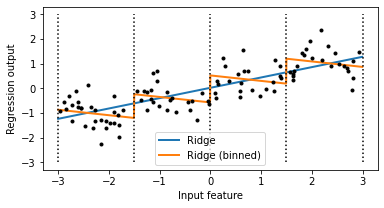

In [42]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_combined, y)


#visualization
line_combined = np.hstack([line, line_binned])

plt.rcParams['figure.figsize'] = [6, 3]
plt.plot(line, lreg.predict(line), lw=2, label="Ridge")
plt.plot(line, reg.predict(line_combined), lw=2, label='Ridge (binned)')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, '.', c='k');

#### Binning + interaction features

* Add interaction features (or product features )

  * Product of the bin encoding and the original feature value

  * Learn different weights per bin

#### Data reload


In [ ]:
import mglearn

# Wavy data
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

from sklearn.preprocessing import OneHotEncoder

# create 11 equal bins
bins = np.linspace(-3, 3, 5)

# assign to bins
which_bin = np.digitize(X, bins=bins)

# transform using the OneHotEncoder.
encoder = OneHotEncoder(sparse=False)

# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)

In [ ]:
X_product = np.hstack([X_binned, X * X_binned])
bin_sname = ["b" + str(s) for s in range(4)] 
X_combined = np.hstack([X, X_product])
pd.set_option('display.max_columns', 10)
bindf = pd.DataFrame(X_combined, columns=["orig"]+bin_sname+["X*" + s for s in bin_sname]).head(3)
bindf.style.set_table_styles(dfstyle)

,orig,b0,b1,b2,b3,X*b0,X*b1,X*b2,X*b3
0,-0.752759,0.000000,1.000000,0.000000,0.000000,-0.000000,-0.752759,-0.000000,-0.000000
1,2.704286,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.704286
2,1.391964,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.391964,0.000000


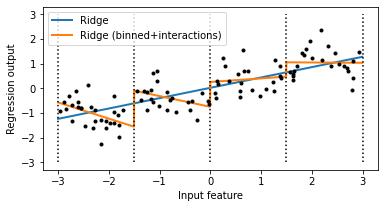

In [ ]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, lreg.predict(line), lw=2, label="Ridge")
plt.plot(line, reg.predict(line_product), lw=2, label='Ridge (binned+interactions)')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, '.', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

#### Categorical feature interactions

* One-hot-encode categorical feature

* Multiply every one-hot-encoded column with every numeric feature

* Allows to built different submodels for different categories

In [ ]:
df = pd.DataFrame({'gender': ['M', 'F', 'M', 'F', 'F'],
                   'age': [14, 16, 12, 25, 22],
                   'pageviews': [70, 12, 42, 64, 93],
                   'time': [269, 1522, 235, 63, 21]
                  })
df.head(3)
df.style.set_table_styles(dfstyle)

,gender,age,pageviews,time
0,M,14,70,269
1,F,16,12,1522
2,M,12,42,235
3,F,25,64,63
4,F,22,93,21


In [ ]:
dummies = pd.get_dummies(df)
df_f = dummies.multiply(dummies.gender_F, axis='rows')
df_f = df_f.rename(columns=lambda x: x + "_F")
df_m = dummies.multiply(dummies.gender_M, axis='rows')
df_m = df_m.rename(columns=lambda x: x + "_M")
res = pd.concat([df_m, df_f], axis=1).drop(["gender_F_M", "gender_M_F"], axis=1)
res.head(3)
res.style.set_table_styles(dfstyle)

,age_M,pageviews_M,time_M,gender_M_M,age_F,pageviews_F,time_F,gender_F_F
0,14,70,269,1,0,0,0,0
1,0,0,0,0,16,12,1522,1
2,12,42,235,1,0,0,0,0
3,0,0,0,0,25,64,63,1
4,0,0,0,0,22,93,21,1


### Dimensionality Reduction
* Reduce Curse of Dimensionality problems
* Increase storage and computational efficiency
* Visualize data in 2D or 3D

#### PCA



##### Load data

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris.data])

# 데이터셋 정규화
scaler = StandardScaler()    
scaler.fit(df)
df_scaled = scaler.transform(df)

# 데이터 프레임으로 자료형 변환 및 target class 정보 추가
df_scaled = pd.DataFrame(df_scaled, columns= ['sepal length', 'sepal width', 'petal length', 'petal width'])
df_scaled['target'] = iris.target

df_scaled

,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


##### Dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA

# 2차원으로 차원 축소, target 정보는 제외
pca = PCA(n_components = 2)
pca.fit(df_scaled.iloc[:,:-1])
 
# pca transform 후 데이터프레임으로 자료형 변경
df_pca = pca.transform(df_scaled.iloc[:,:-1])
df_pca = pd.DataFrame(df_pca, columns = ['component 0', 'component 1'])

df_pca

,component 0,component 1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


##### Visualization

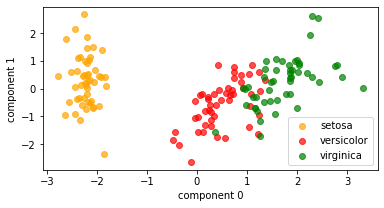

In [ ]:
import matplotlib.pyplot as plt

# class target 정보 불러오기 
df_pca['target'] = df_scaled['target']

# target 별 분리
df_pca_0 = df_pca[df_pca['target'] == 0]
df_pca_1 = df_pca[df_pca['target'] == 1]
df_pca_2 = df_pca[df_pca['target'] == 2]

# target 별 시각화
plt.scatter(df_pca_0['component 0'], df_pca_0['component 1'], color = 'orange', alpha = 0.7, label = 'setosa')
plt.scatter(df_pca_1['component 0'], df_pca_1['component 1'], color = 'red', alpha = 0.7, label = 'versicolor')
plt.scatter(df_pca_2['component 0'], df_pca_2['component 1'], color = 'green', alpha = 0.7, label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

#### t-Distributed Stochastic Nearest Neighbor Embeddings (t-SNE)
* Great for visualizing datasets in 2D
* Need to analyze multiple perplexity values (tuning parameter
related to standard deviation of the Gaussian, to balance
local and global attention)
* Not deterministic, the cost function for t-SNE is not convex
* More hyperparameters (learning rate epsilon)

##### Load data

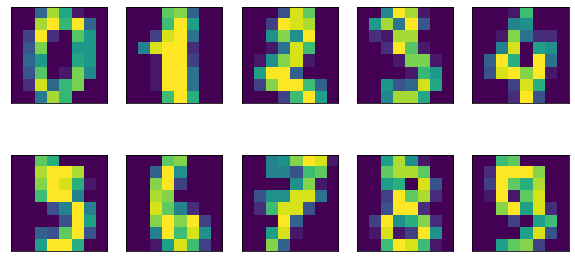

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
fig, axes = plt.subplots(2,5,figsize=(10,5),
                        subplot_kw = {'xticks':(), 'yticks':()})
for ax, imgs in zip(axes.ravel(), digits.images):
    ax.imshow(imgs)

##### sklearn.manifold.[TSNE(n_components=2, random_state=None,init='warn' ,learning_rate='warn')](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

T-distributed Stochastic Neighbor Embedding.

t-SNE is a tool to visualize high-dimensional data.   
It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.

* n_components: int, default=2  
Dimension of the embedded space.

* learning_rate: float or ‘auto’, default=200.0  
The learning rate for t-SNE is usually in the range **[10.0, 1000.0]**.   
If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours.  
If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. 

* init: {'random', 'pca'} or ndarray of shape (n_samples, n_components), default='random'  
Initialization of embedding. Possible options are **random**, **pca**, and a **numpy array of shape (n_samples, n_components)**. 

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


tsne = TSNE(random_state = 42, init='random', learning_rate=200.0)

pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

##### Visualization

Text(0, 0.5, 't-SNE characteristic 1')

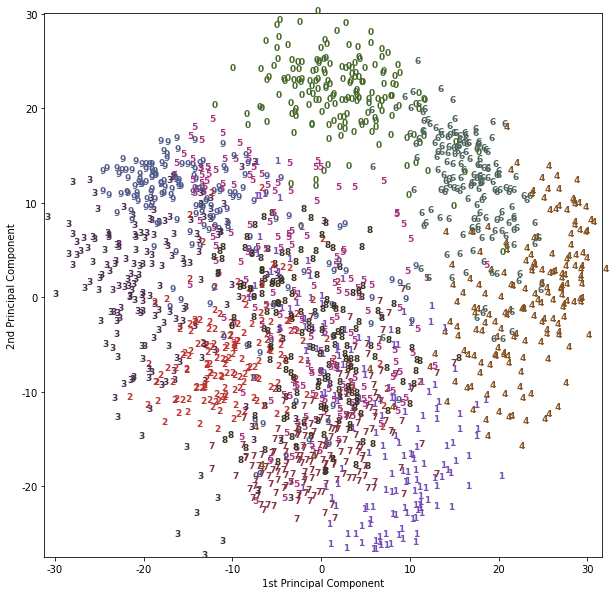

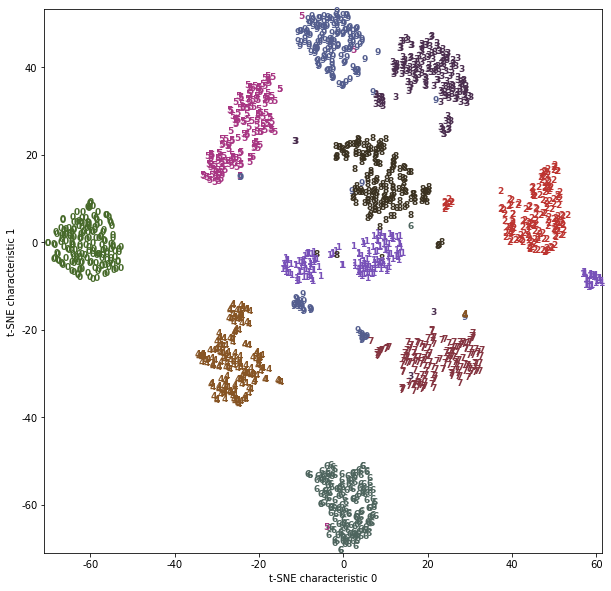

In [ ]:
# visualization 설정
plt.rc('axes', unicode_minus=False)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]

# 주성분 기준 시각화
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]] ,fontdict={'weight': 'bold', 'size':9}           )
##fontdict={'weight': 'bold', 'size':9}
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")


#특성 기준 시각화
#TSNE에는 transform 메서드가 없으므로, fit_transform을 사용
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {'weight':'bold','size':9})
plt.xlabel("t-SNE characteristic 0")
plt.ylabel("t-SNE characteristic 1")



# Exercise

## Feature Selection

wine dataset을 이용하여 다음 질문에 답하시오.

```python
from sklearn.datasets import load_wine
wine = load_wine()
```

### 1번 문제

Unsupervised feature selection 기법 중 <font color="red">VarianceThreshold</font>를 사용하여 feature selection을 수행해보시오.

threshold =0.04 사용, min-max scaling 적용




```python
selector = VarianceThreshold(threshold=0.04)
X_selected = selector.fit_transform(X)
variances = selector.variances_

selector_trans = selector.get_feature_names_out()
```

### 1번 문제 답안

### 2번 문제

Supervised feture selection 기법 중 Univariate statistics(F-test)에 해당하는 것들로 feature selection을 수행하시오:
* For regression: <font color="red">f_regression, mutual_info_regression</font>

* For classification: <font color="red">f_classification, mutual_info_classication</font>, ...

* Selecting: <font color="red">SelectKBest, SelectPercentile</font>,…



```python
selector = SelectPercentile(score_func=f_regression, percentile=50)
X_selected = selector.fit_transform(X,y)
selected_features = selector.get_support()
f_values, p_values = f_regression(X,y)
mi_values = mutual_info_regression(X,y,discrete_features='auto')
```



### 2번 문제 답안

### 3번 문제 

Supervised feature selection 기법 중 Model-based에 해당하는 것들로 feature selection을 수행하시오:
* <font color="red">SelectFromModel</font>: requires a model and a selection threshold

* <font color="red">RFE</font> (recursive feature elimination): requires model and final nr features



```python
selector = SelectFromModel(RandomForestRegressor(), threshold='mean')
rfe_selector = RFE(RidgeCV(), n_features_to_select=20)
X_selected = selector.fit_transform(X)
rf_importances = Randomforest().fit(X, y).feature_importances_
```



### 3번 문제 답안

### 4번 문제

Supervised feature selection 기법 중 Sequential feature selection로 feature selection을 수행하시오

LinearRegression & n_features_to_select=0.5 사용

```python
lr = LinearRegression()

# Sequential Feature Selection
# n_features_to_select 수치를 조정하여 몇 개의 feature를 뽑을지 정할 수 있음
sfs = SequentialFeatureSelector(lr, n_features_to_select=0.5)
```



### 4번 문제 답안

### 5번 문제

Supervised feature selection 기법 중 Permutation feature Importance의 결과 중 importances_mean을 사용해 feature selection을 수행하시오

파라미터 동일하게 활용

```python
importances = permutation_importance(RandomForestRegressor().fit(X,y), 
                                     X, y, n_repeats=10, random_state=42).importances_mean
feature_ids = (-importances).argsort()[:n]
```



### 5번 문제 답안

## Feature Transformation

### 1번 문제 

아래 참조 코드와 같이 파이프라인을 생성하고, GridSearchCV를 활용하여 가장 높은 점수를 받는 polynomialfeatures__degree, ridge__alpha 조합을 도출하시오.
(wine dataset 사용)



```python
from sklearn.datasets import load_wine
wine = load_wine()
```



```python
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(), Ridge())
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid).fit(X_train, y_train)
```



### 2번 문제 

PCA 함수를 통해 Wine 데이터셋의 컬럼을 2개로 축소하고, linear regression 모델의 r2 점수를 비교하시오.



```python
from sklearn.datasets import load_wine
wine = load_wine()
```



```python
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(wine_X)
```

